In [1]:
%matplotlib inline

import csv
import os
import zipfile
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import shuffle

le = preprocessing.LabelEncoder()


data_path = "./"
full_path = data_path+"/train.csv.zip"
base = os.path.basename(data_path+"train.csv.zip")
file_name = os.path.splitext(base)[0]
with open(full_path, 'rb') as fh:
    zfile = zipfile.ZipFile(fh)
    data = shuffle(pd.read_csv(zfile.open(file_name)))
labels = le.fit_transform(data[:,-1])
#print(data.describe())

In [2]:
from sklearn.preprocessing import StandardScaler

#labels = copy.copy(le.transform(data.iloc[:,-1]))
#data = data[:,1:-1]
scaler = StandardScaler()
X = scaler.fit_transform(data[:,1:-1])
#data_reduced = sklearn.feature_selection.SelectKBest(sklearn.feature_selection.chi2, k=30).fit_transform(data.iloc[:,1:-1], labels)

/usr/lib64/python2.7/site-packages/sklearn/utils/validation.py:332: UserWarning: StandardScaler assumes floating point values as input, got object
  "got %s" % (estimator, X.dtype))


In [23]:
data.describe()
data.iloc[:,-1]

0     Class_1
1     Class_1
2     Class_1
3     Class_1
4     Class_1
5     Class_1
6     Class_1
7     Class_1
8     Class_1
9     Class_1
10    Class_1
11    Class_1
12    Class_1
13    Class_1
14    Class_1
...
61863    Class_9
61864    Class_9
61865    Class_9
61866    Class_9
61867    Class_9
61868    Class_9
61869    Class_9
61870    Class_9
61871    Class_9
61872    Class_9
61873    Class_9
61874    Class_9
61875    Class_9
61876    Class_9
61877    Class_9
Name: target, Length: 61878, dtype: object

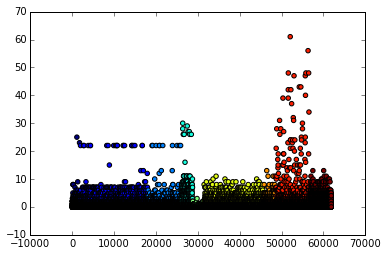

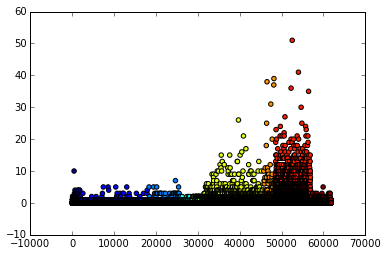

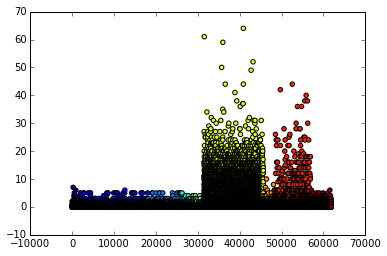

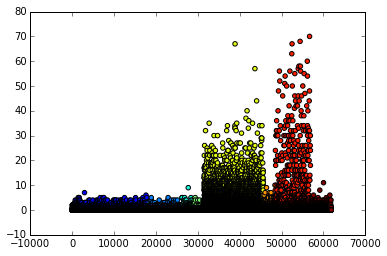

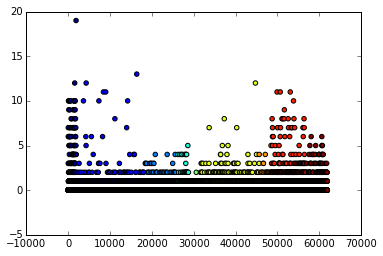

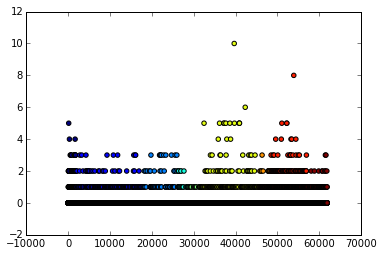

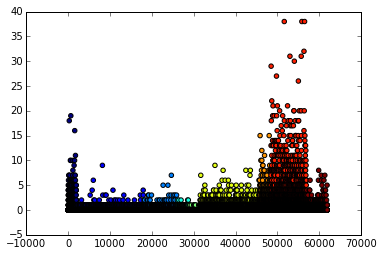

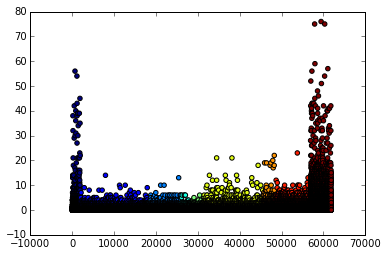

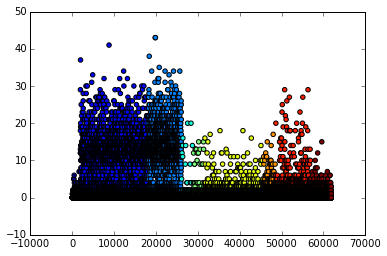

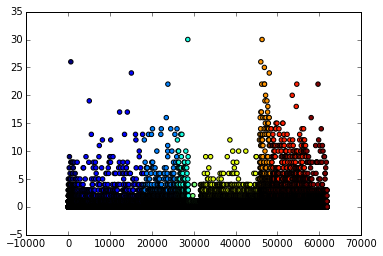

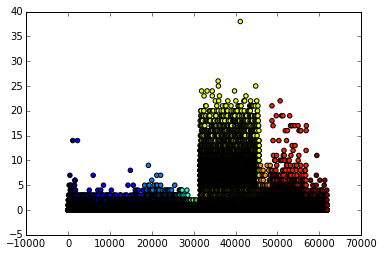

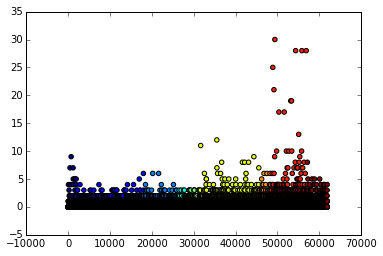

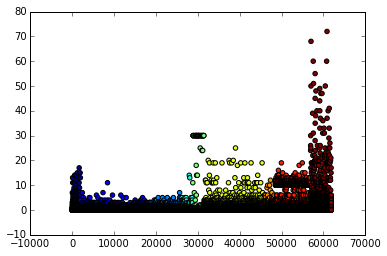

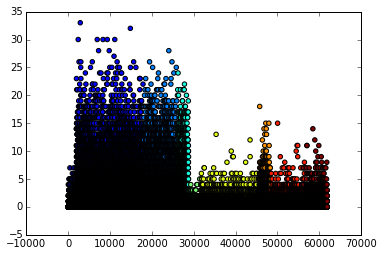

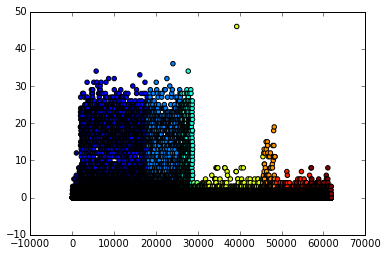

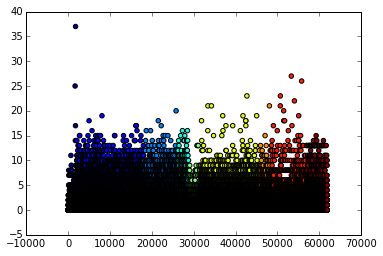

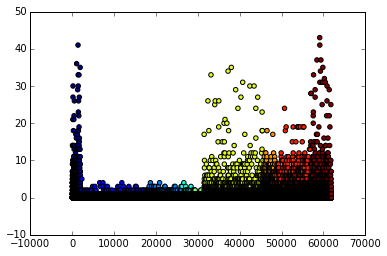

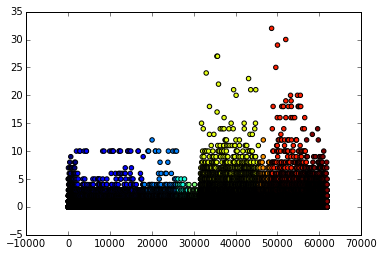

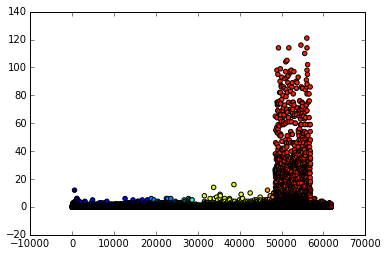

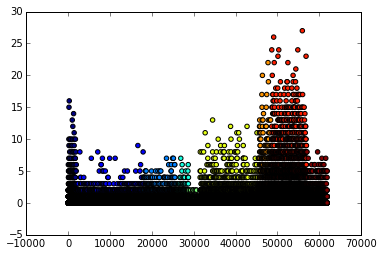

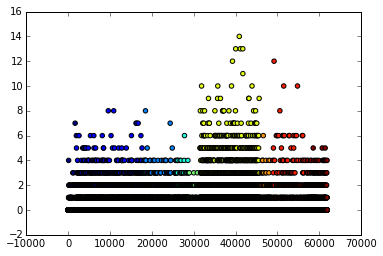

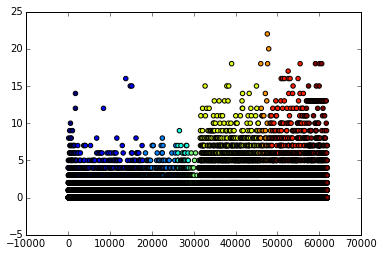

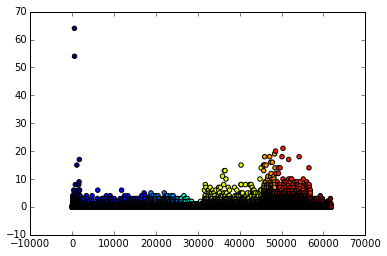

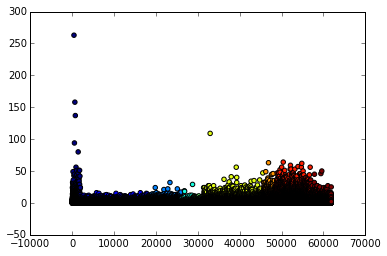

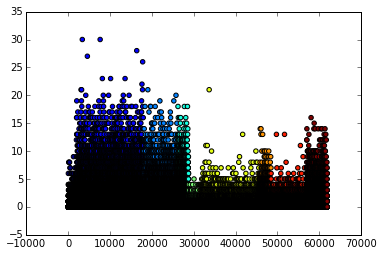

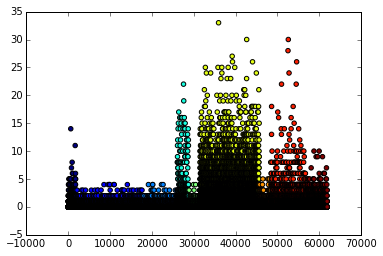

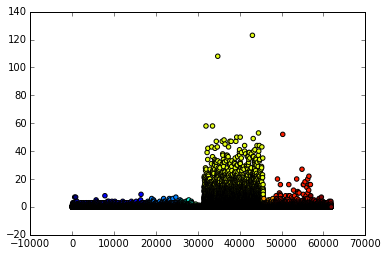

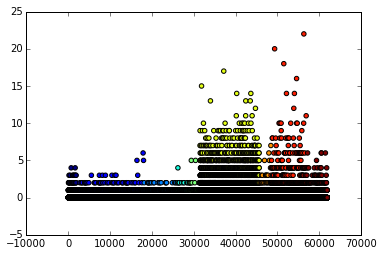

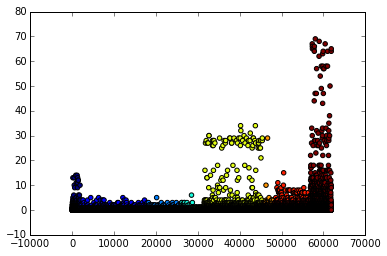

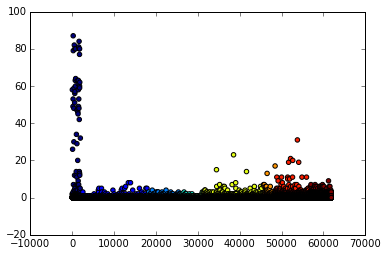

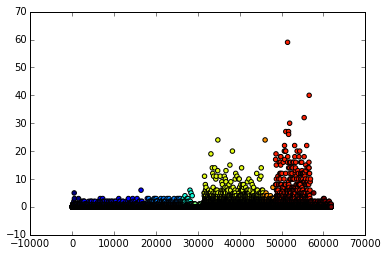

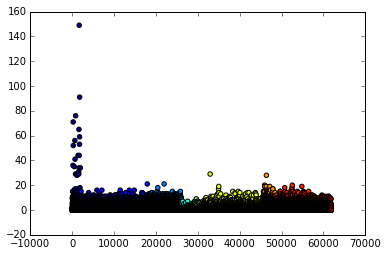

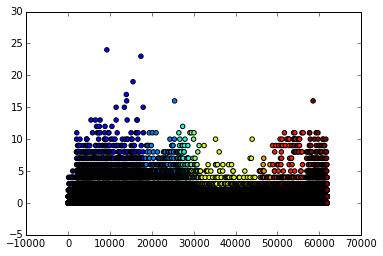

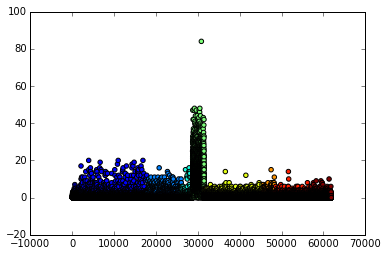

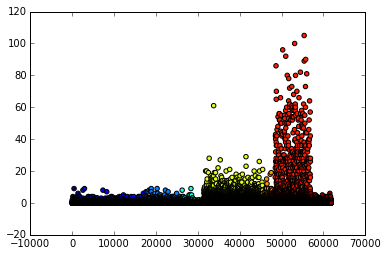

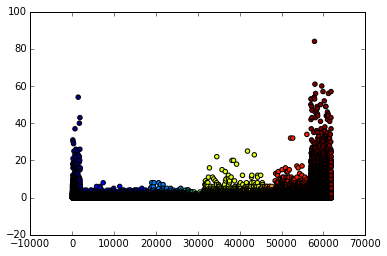

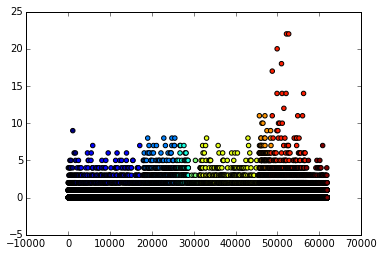

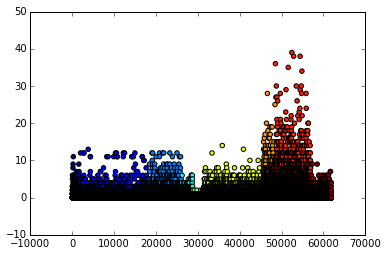

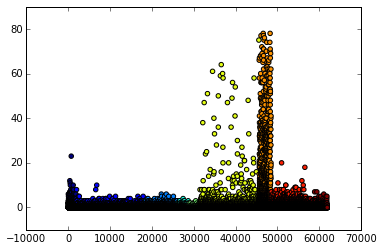

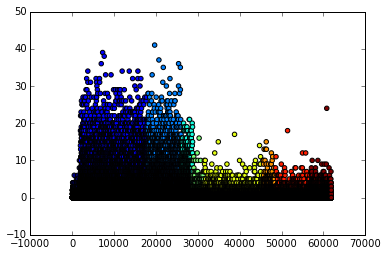

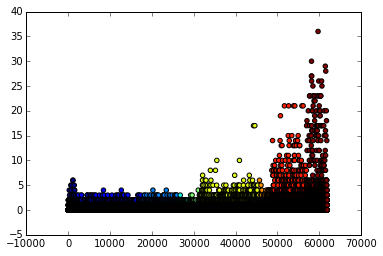

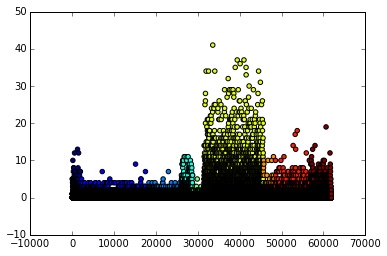

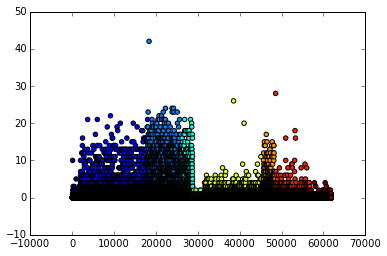

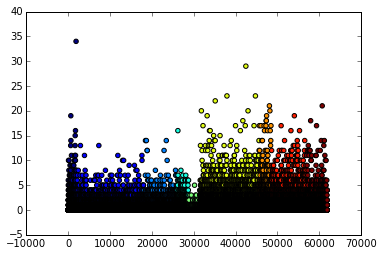

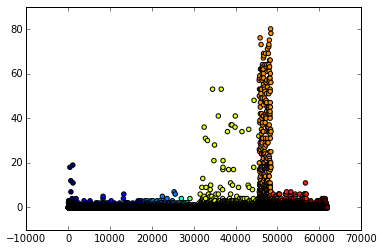

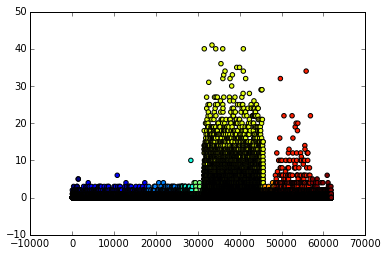

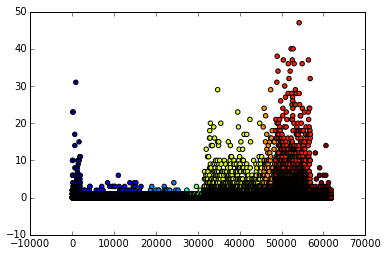

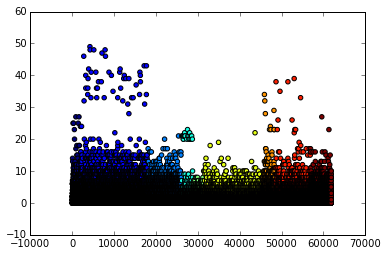

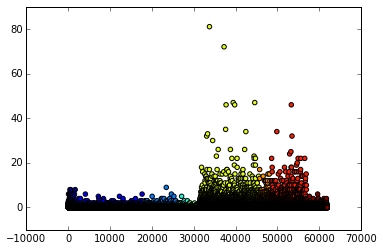

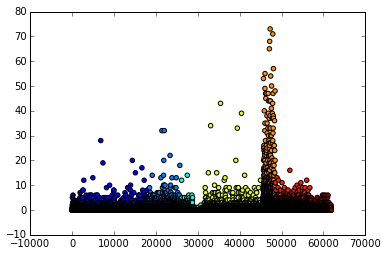

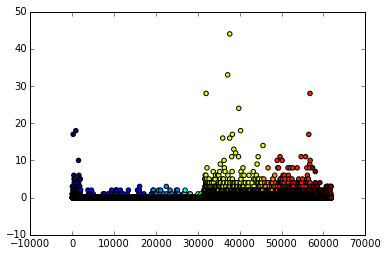

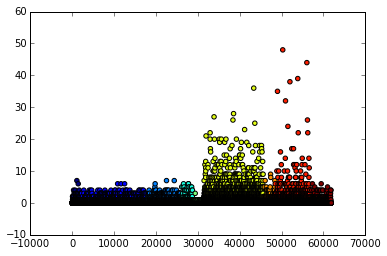

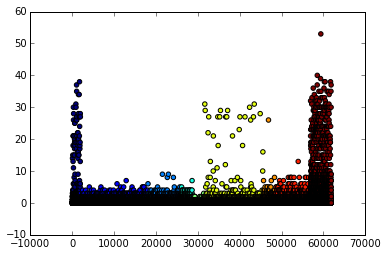

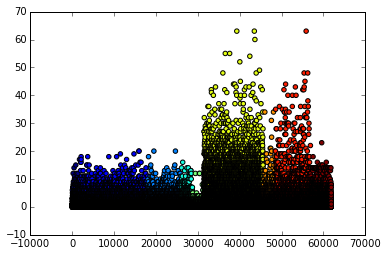

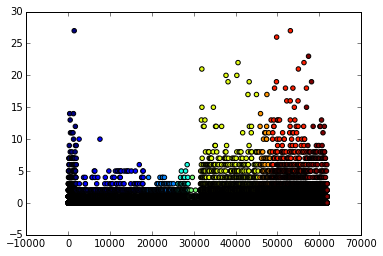

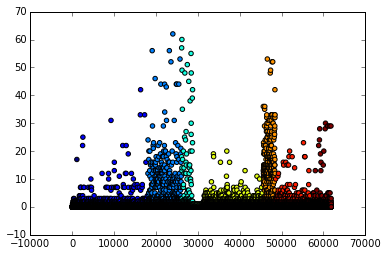

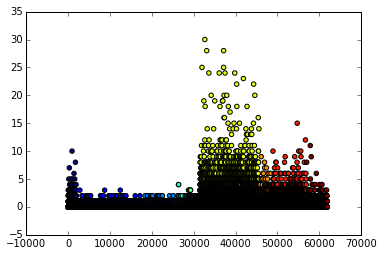

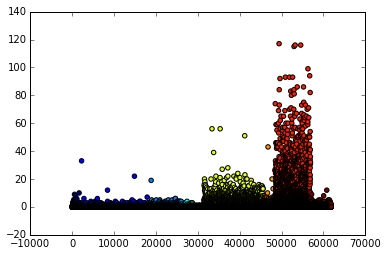

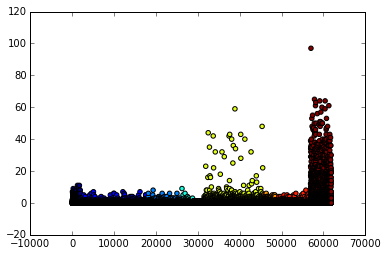

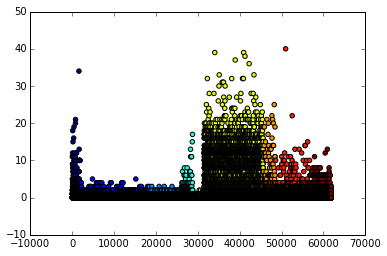

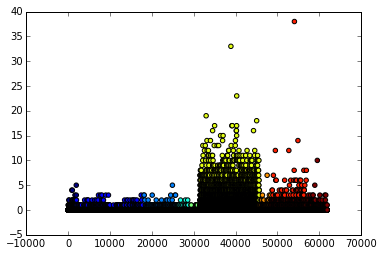

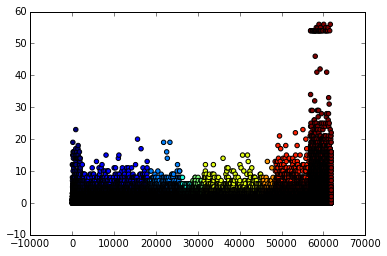

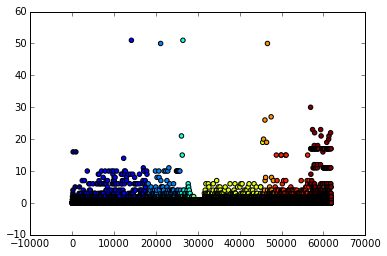

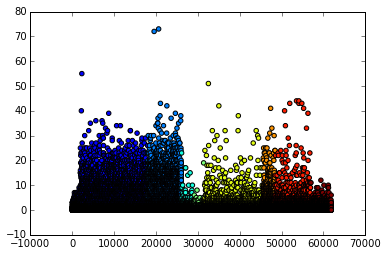

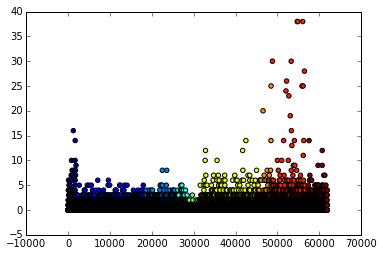

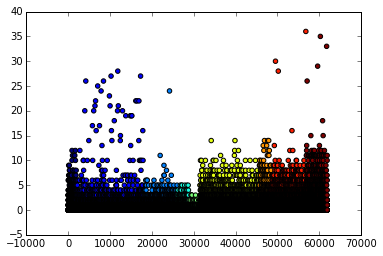

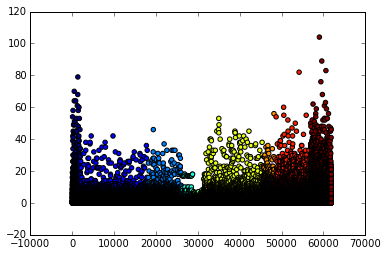

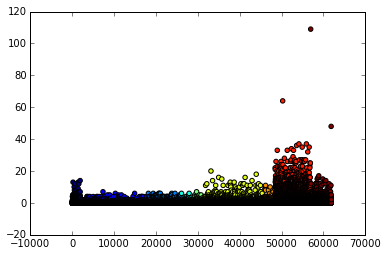

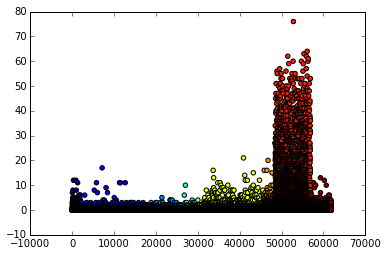

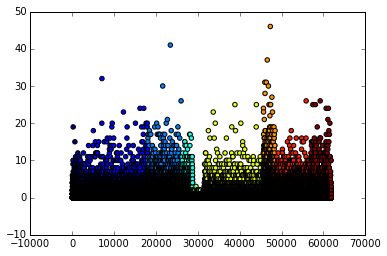

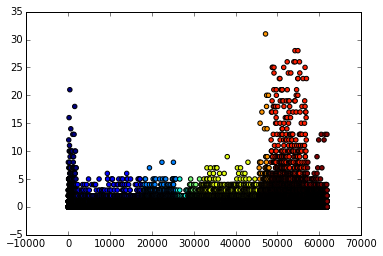

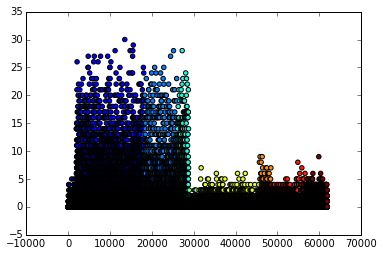

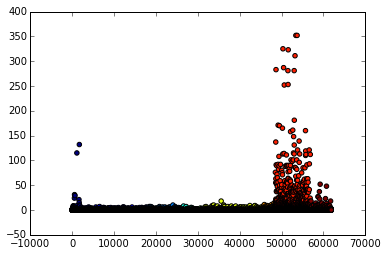

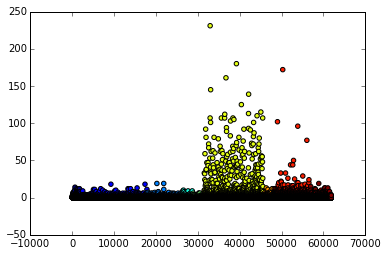

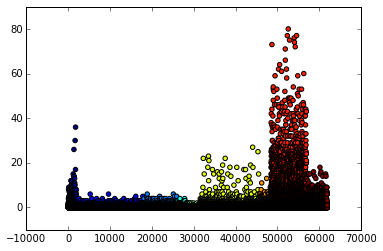

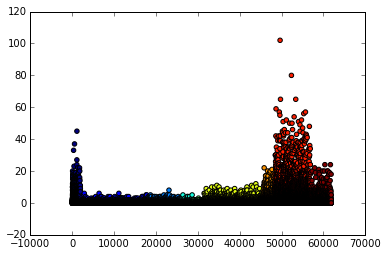

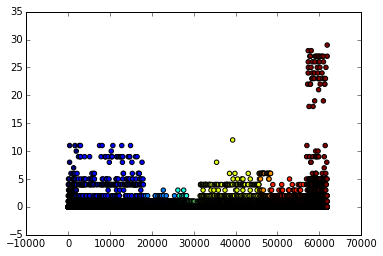

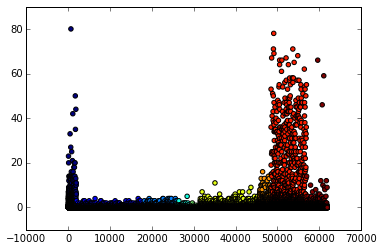

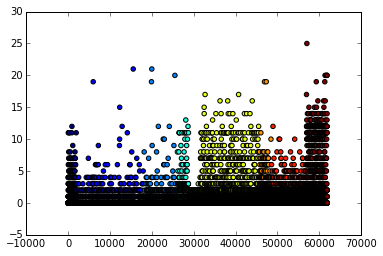

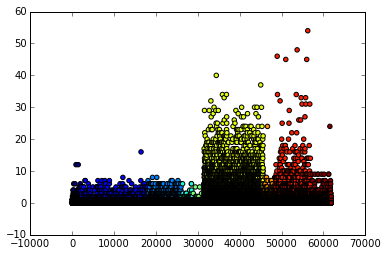

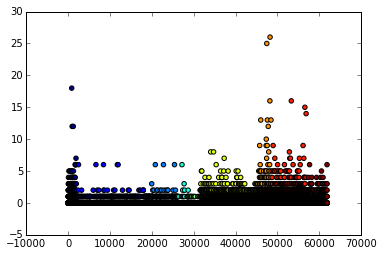

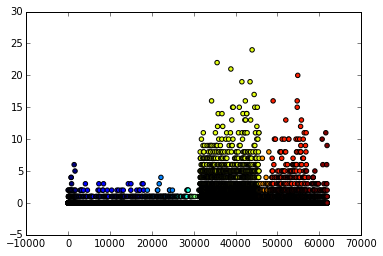

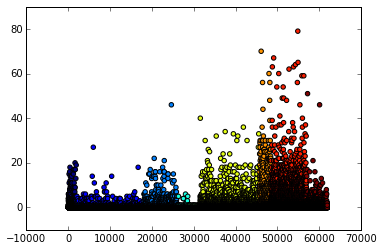

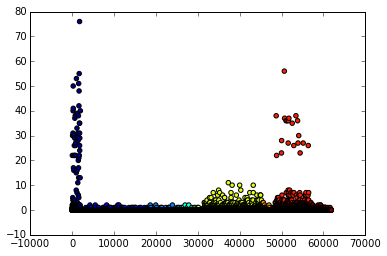

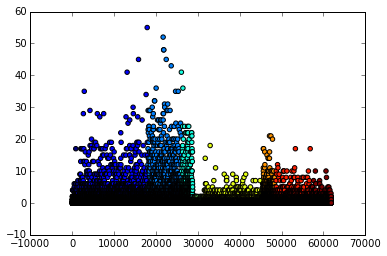

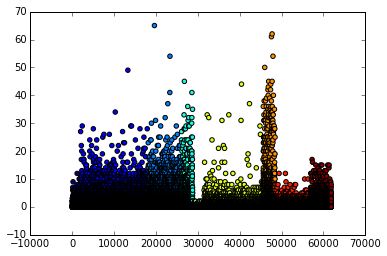

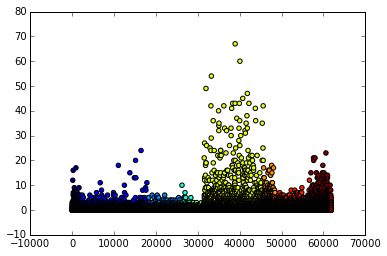

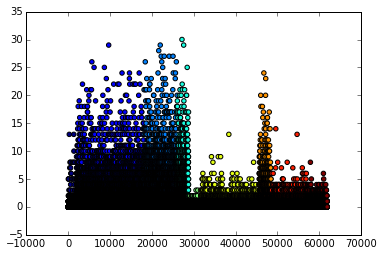

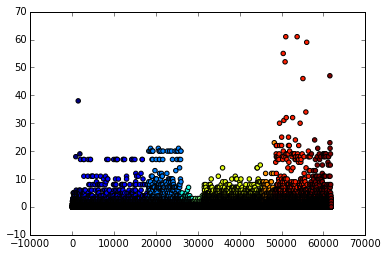

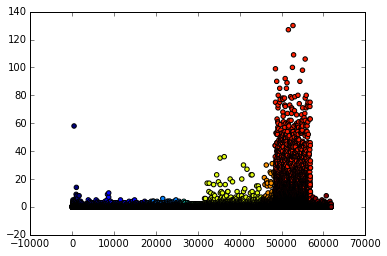

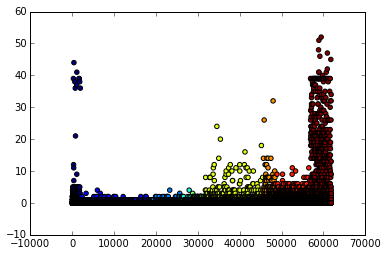

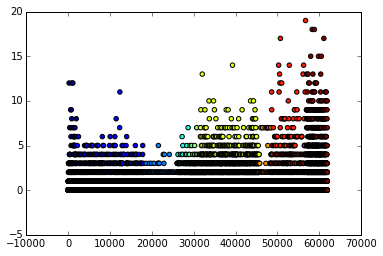

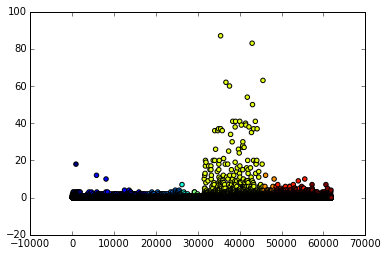

ValueError: could not convert string to float: 'Class_9'

/usr/lib64/python3.3/site-packages/IPython/core/formatters.py:239: FormatterWarning: Exception in image/png formatter: could not convert string to float: 'Class_9'
  FormatterWarning,


In [2]:
for i in range(1,data.shape[0]-3):
    print(i)
    plt.scatter(data.iloc[:,0],data.iloc[:,i],c=le.transform(data.iloc[:,-1]))
    plt.show()

In [ ]:
%%timeit
%run 2-1-run_hyperopt.ipy

In [1]:
import pandas as pd
print(trials.best_trial['result'])
print("")
print(pd.DataFrame(trials.results)[['loss','type','options']].sort('loss'))

NameError: name 'trials' is not defined

In [ ]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet



net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden1', layers.DenseLayer),
        ('dropout1', layers.DropoutLayer),
        ('hidden2', layers.DenseLayer),
        ('dropout2', layers.DropoutLayer),
        ('hidden3', layers.DenseLayer),
#        ('dropout3', layers.DropoutLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, 93),  # input pixels per batch
    hidden1_num_units=400,  # number of units in hidden layer
    dropout1_p=0.5,
    hidden2_num_units=200,  # number of units in hidden layer
    dropout2_p=0.5,
    hidden3_num_units=100,  # number of units in hidden layer
#    dropout3_p=0.5,
#    hidden1_nonlinearity=lasagne.nonlinearities.sigmoid,
    output_nonlinearity=lasagne.nonlinearities.softmax,  # output layer uses identity function
    output_num_units=9,  # target values

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=False,  # flag to indicate we're dealing with classification problem
    max_epochs=400,  # we want to train this many epochs
    verbose=1,
    )

#print(data[0])
print(type(labels))
print(le.classes_)
net1.fit(np.array(X, dtype=np.float32), np.array(labels,dtype=np.int32))

<type 'numpy.ndarray'>
['Class_1' 'Class_2' 'Class_3' 'Class_4' 'Class_5' 'Class_6' 'Class_7'
 'Class_8' 'Class_9']
  DenseLayer        	(None, 9)           	produces       9 outputs
  DropoutLayer      	(None, 200)         	produces     200 outputs
  DenseLayer        	(None, 200)         	produces     200 outputs
  DropoutLayer      	(None, 400)         	produces     400 outputs
  DenseLayer        	(None, 400)         	produces     400 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    0.962980  |    0.672460  |     1.432024  |     74.82%  |  12.3s
     2  |    0.732531  |    0.634928  |     1.153723  |     75.64%  |  12.3s
     3  |    0.692258  |    0.611052  |     1.132897  |     76.24%  |  12.3s
     4  |    0.666497  |    0.594330  |     1.121426  |     77.02%  |  12.3s
     5  |    0.649550